
## EXERCICE 8 : Utilisation de Pandas et sklearn pour l'analyse de données réelles



In [15]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


### Question 1 : 
- utiliser la fonction pandas.read_csv avec les bonnes options pour charger le fichier RealMedicalData.csv. On remarquera que le separateur dans le fichier csv est ';' et que les decimales sont representees par des virgules et non des points. Il est important de remarquer qu'un dataframe et non un numpy array sera retourne. Cette classe contient l'equivalent d'un numpy.array mais aussi le nom des lignes et colonnes, tout comme dans les dataframes de R
- Extraire deux numpy.arrays X et y des donnes pour faire par la suite de la regression. Nous allons essayer d'expliquer  'Disease progression' avec les autres variables. Ce sera alors la colonne qui contient y. Les autres colonnes contiendront les donnees de X.
- Une fois X et y extrait, centrer et reduire X. La fonction sklearn.preprocessing.scale pourra etre utilisee


In [25]:
from sklearn.preprocessing import scale

data = pandas.read_csv("RealMedicalData.csv", sep=';')
data

y = data["Disease progression"].values

# Extraire les autres colonnes comme X
X = data.drop(columns=["Disease progression"]).values
X = np.array([x.replace(',', '.') for x in X.flatten()]).reshape(X.shape)
X = X.astype(float)
X_scaled = preprocessing.scale(X)
X_scaled

array([[-0.39452241,  0.32973066,  0.13599835, ...,  0.58355627,
        -0.40971102,  1.80051593],
       [ 0.53841345,  3.06250605,  0.78879044, ..., -0.84133927,
         1.80003087, -0.60474976],
       [ 0.49057058,  0.39638372,  0.02719967, ..., -0.77753797,
        -0.63699875,  0.99089264],
       ...,
       [ 1.85409222,  2.92919993,  3.07356275, ..., -0.41599732,
        -1.16102326,  0.03728387],
       [-0.538051  , -0.73671827, -0.34271585, ..., -0.94767475,
        -1.1799639 ,  0.0538068 ],
       [ 1.25605642, -0.60341216, -0.74527097, ..., -1.01147604,
        -0.12560135,  0.03964429]])


### Question 2 : 
- Mettre en lien X et y a l'aide de la regression lineaire multiple avec une penalisation Lasso
- A la vue des resultats, quelle variable vous semble liee a 'Disease progression'?
- Verifier cette relation en representant des nuages de points mettant en lien les observations de chaque variable avec les observations de 'Disease progression'



MSE avec pénalisation Lasso : 11.480923895867486
Coefficients de régression avec pénalisation Lasso : [ 0.7571901  0.         0.         0.        -0.        -0.
 -0.        -0.        -0.         0.         0.         0.
  0.         0.         0.        -0.        -0.         0.       ]


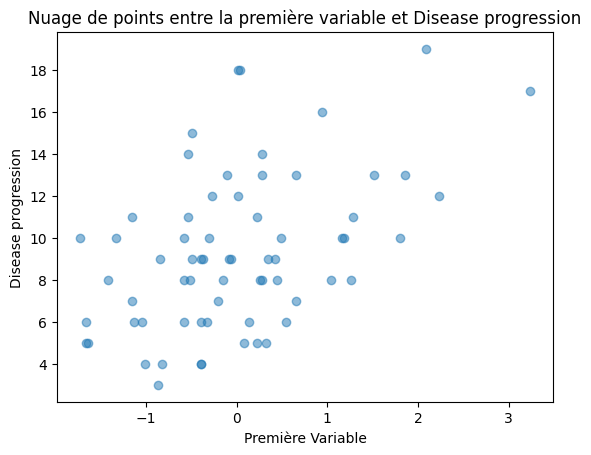

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Créez un modèle de régression Lasso
lasso_model = Lasso(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha selon vos besoins

# Ajustez le modèle aux données
lasso_model.fit(X_scaled, y)

# Effectuez des prédictions
y_pred = lasso_model.predict(X_scaled)

# Évaluez la performance avec la MSE
mse = mean_squared_error(y, y_pred)
print("MSE avec pénalisation Lasso :", mse)

# Obtenez les coefficients de régression (a) après ajustement
coefficients = lasso_model.coef_
print("Coefficients de régression avec pénalisation Lasso :", coefficients)
#Seul le premier coefficient est non nul, laissant penser que seul l'acid 1 density a une influence sur la Disease progression


import matplotlib.pyplot as plt

# Supposons que la première variable soit X[:, 0] (ajustez selon votre jeu de données)
first_variable = X_scaled[:, 0]

# Créez un nuage de points
plt.scatter(first_variable, y, alpha=0.5)
plt.xlabel("Première Variable")
plt.ylabel("Disease progression")
plt.title("Nuage de points entre la première variable et Disease progression")
plt.show()
